In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import sklearn as sk
import statsmodels as sm 

%matplotlib inline
plt.rcParams['figure.figsize']=10,8
plt.rcParams['axes.grid'] = True

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
credit = pd.read_excel('C:/Users/tejan/Desktop/Data Analystics/class work/Case Study/1. Predicting Credit Card Spend & Identifying Key Drivers/Data Set.xlsx')


In [3]:
credit.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [4]:
credit.shape

(5000, 130)

In [5]:
# missing value check 
credit.isnull().any().sum()

15

In [6]:
credit['total_spent']=credit['cardspent']+credit['card2spent']

In [7]:
credit.drop(['cardspent', 'card2spent'], axis = 1, inplace = True)

In [8]:
credit['ln_TotalSpent']=np.log(credit['total_spent'])

<AxesSubplot:ylabel='Frequency'>

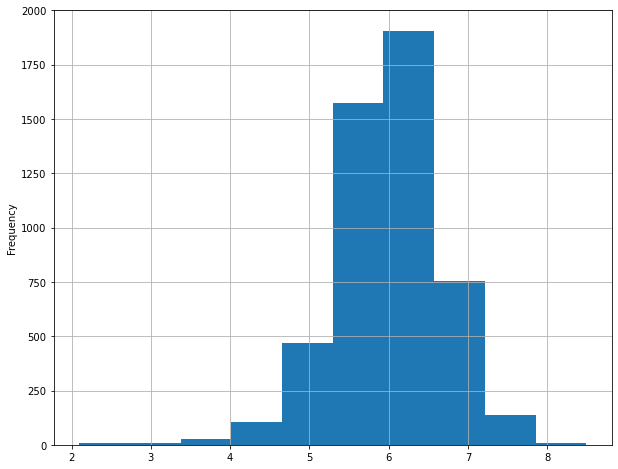

In [9]:
credit['ln_TotalSpent'].plot.hist(bins=10)

In [10]:
credit.drop(['total_spent'], axis = 1, inplace = True)

In [11]:
# as we have taken log of depndent variable we can drop incependent variable which have log and normal value 

credit.drop(['custid', 'birthmonth', 'pets','age', 'creddebt', 'income', 'othdebt', 'commute', 'vote', 'polview', 'callid', 'wiremon',
            'wireten', 'cardten', 'cardmon', 'equipten', 'equipmon', 'tollten', 'tollmon', 'longten', 'longmon'
            ], axis = 1, inplace = True)

In [15]:
credit.isnull().any().sum()

0

In [13]:
credit.fillna(0, inplace=True)

In [14]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 108 entries, region to ln_TotalSpent
dtypes: float64(18), int64(90)
memory usage: 4.1 MB


In [16]:
# no need of outlier

In [17]:
# corelation 
corrm=credit.corr()


In [18]:
corrm.to_csv('C:/Users/tejan/Desktop/corr.csv')

In [19]:
train, test = train_test_split(credit, test_size = 0.3, random_state = 12345)

In [20]:
feature_columns = credit.columns.difference (['ln_TotalSpent'])


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [23]:
#creating VIF
# to check the multicollinearity
model_param = 'ln_TotalSpent ~ ' + ' + '.join(feature_columns)


In [24]:
y, X = dmatrices(model_param , train, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the output
# vif.round(1)


In [25]:
vif.round(1).sort_values('VIF Factor', ascending= False).to_csv('C:/Users/tejan/Desktop/VIF.csv')

In [26]:
# dropping on the basis of VIF and correlation 
credit.drop(['lnequipmon', 'spoused', 'lntollmon', 'wireless', 'card2tenure', 'ed', 'address', ], axis = 1, inplace = True)

In [27]:
credit.drop(['lnwiremon','lncardten', 'equip', 'lncardmon', 'inccat' ], axis = 1, inplace = True)

In [28]:
credit.drop([ 'carvalue','addresscat', 'card2tenurecat','commutebus', 'commutebike', 'commutecar',
'commutecat',  'commutenonmotor', 'confer', 'commutewalk', 'news', 'owncd', 'ownfax', 'owngame', 
'ownpda', 'ownipod', 'ownvcr', 'pets_cats', 'response_01', 'response_02', 'tollfree', 'tenure' ], axis = 1, inplace = True)

In [29]:
credit.drop(['lnlongten', 'bfast', 'homeown', 'commutepublic', 'lnequipten', 'lntollten' , 'lnwireten', 'pets_freshfish',
             'polparty', 'townsize', 'telecommute', 'spousedcat', 'reside' ], axis = 1, inplace = True)

In [30]:
credit.drop([ 'cardfee', 'cardtenure', 'employ', 'lnlongmon'], axis = 1, inplace = True)

In [31]:
credit.drop(['pets_small', 'callcard', 'callwait', 'forward', 'jobsat', 'empcat',  ], axis = 1, inplace = True)

In [32]:
credit.drop(['voice', 'polcontrib', 'pets_saltfish', 'pets_birds', 'pager', 'marital', 'hometype', 'edcat', 'union', 
             'pets_reptiles', 'multline', 'hometype' , 'cartype'  ], axis = 1, inplace = True)

In [33]:
credit.drop(['region','jobcat', 'commutetime', 'commuterail', 'ownpc','commutemotorcycle' , 'commutecarpool', 'carbought', 'carcatvalue' ], axis = 1, inplace = True)

In [ ]:
# dropped insignificant variables ont the basis of high multicollinearity

In [157]:
# creating stats model to check p values of the variable on the basis of that we will drop variables

#model 1
lm1 = smf.ols(model_param, train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_TotalSpent   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     44.02
Date:                Tue, 29 Dec 2020   Prob (F-statistic):          4.61e-211
Time:                        16:46:16   Log-Likelihood:                -3031.5
No. Observations:                3500   AIC:                             6123.
Df Residuals:                    3470   BIC:                             6308.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6345      0.159     35.491

In [35]:
credit2 = credit

In [36]:
# model2

In [37]:
credit.shape

(5000, 30)

In [38]:
# now dropping some variables on the basis of P values
credit2.drop([ 'lnothdebt', 'card2fee'], axis = 1, inplace = True)

In [39]:
credit2.drop([ 'carown', 'cardbenefit','card2benefit', 'cardtype', 'card2type', ], axis = 1, inplace = True)

In [40]:
feature_columns1 = credit2.columns.difference (['ln_TotalSpent'])


In [41]:
#creating VIF
model_param2 = 'ln_TotalSpent ~ ' + ' + '.join(feature_columns1)


In [42]:
train1, test1 = train_test_split(credit2, test_size = 0.3, random_state = 12345)

In [43]:
# creating stats model to check p values of the variable on the basis of that we will drop variables

#model 1
lm2 = smf.ols(model_param2, train1).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:          ln_TotalSpent   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     58.03
Date:                Thu, 04 Feb 2021   Prob (F-statistic):          1.07e-216
Time:                        16:53:06   Log-Likelihood:                -3032.4
No. Observations:                3500   AIC:                             6111.
Df Residuals:                    3477   BIC:                             6252.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6009      0.123     45.515

In [44]:
train1['pred_spend'] = np.exp(lm2.predict(train1))


<ipython-input-44-a5ec91deafae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['pred_spend'] = np.exp(lm2.predict(train1))


In [45]:
test1['pred_spend'] = np.exp(lm2.predict(test1))

<ipython-input-45-6dde5a1b5fae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['pred_spend'] = np.exp(lm2.predict(test1))


In [47]:

train1['actual_spend'] = np.exp(train1.ln_TotalSpent)
test1['actual_spend'] = np.exp(test1.ln_TotalSpent)


<ipython-input-47-fded4157a81a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['actual_spend'] = np.exp(train1.ln_TotalSpent)
<ipython-input-47-fded4157a81a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['actual_spend'] = np.exp(test1.ln_TotalSpent)


In [48]:
train1.head()

,gender,agecat,retire,lninc,debtinc,lncreddebt,default,pets_dogs,cars,carbuy,...,churn,internet,ebill,owntv,hourstv,owndvd,response_03,ln_TotalSpent,pred_spend,actual_spend
509,0,4,0,4.094345,7.4,0.859543,0,0,3,1,...,0,0,0,1,16,1,0,6.743953,594.146246,848.91
3847,1,6,0,5.252273,9.7,2.046955,0,2,3,1,...,0,0,0,1,18,1,1,6.419848,788.345817,613.91
3417,1,6,0,4.465908,5.3,-0.111452,0,0,5,1,...,0,0,0,1,17,1,0,6.265206,472.389400,525.95
382,0,4,0,2.772589,11.8,-0.425798,1,0,2,0,...,1,3,1,1,27,1,0,5.803266,344.208827,331.38
1345,0,5,0,3.465736,15.8,0.064679,0,0,2,0,...,0,0,0,1,22,1,0,6.743588,422.081206,848.60


In [49]:
from sklearn import metrics
import numpy as np
import scipy.stats as stats

In [50]:
MAPE_train = np.mean(np.abs(train1.actual_spend - train1.pred_spend)/train1.actual_spend )
print(MAPE_train)

RMSE_train = metrics.mean_squared_error(train1.actual_spend , train1.pred_spend)
print(RMSE_train)

print('test data set................')

#Test Data
MAPE_test = np.mean(np.abs(test1.actual_spend - test1.pred_spend)/test1.actual_spend )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test1.actual_spend , test1.pred_spend)
print(RMSE_test)

0.5577003217671008
95730.90807198497
test data set................
0.5802677293683657
97208.65531983455


In [ ]:
########

In [52]:
residuals = train1['pred_spend'] - train1['actual_spend']

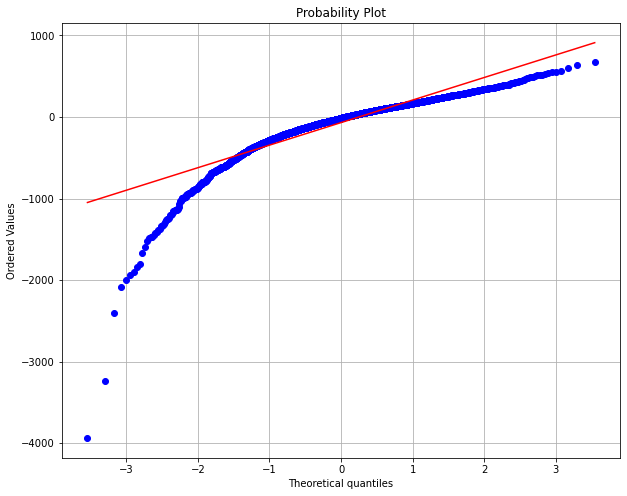

In [53]:
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

C:\Users\tejan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

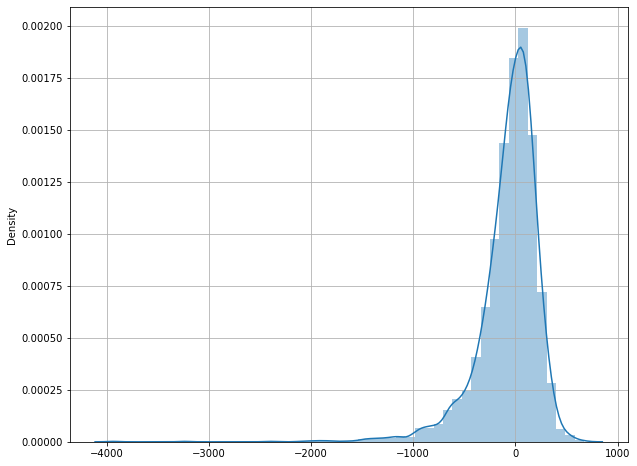

In [54]:
sns.distplot( residuals )